# NLP Prediction And Topic Modeling

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [6]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df[['v1','v2']]

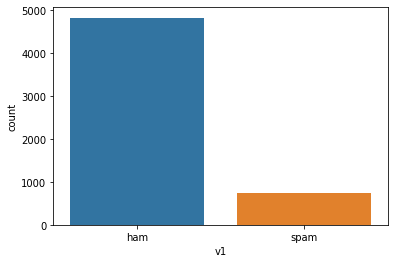

In [9]:
#0-ham
#1-spam
sns.countplot(df['v1'])

In [10]:
df.shape

(5572, 2)

In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.dropna()

In [12]:
df = df.replace(["ham","spam"],[0,1])

In [13]:
words = df['v2'].values

In [14]:
ls = []

for i in words:
    ls.append(str(i))

(-0.5, 1599.5, 799.5, -0.5)

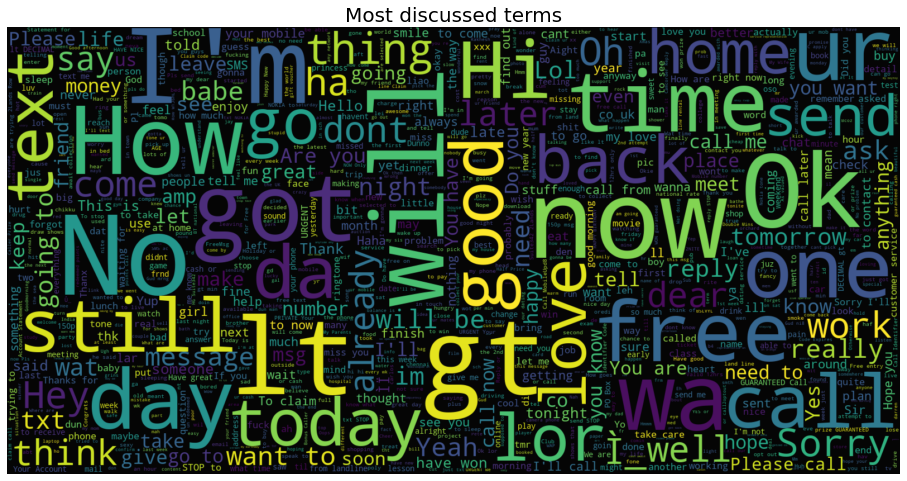

In [15]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", stopwords = STOPWORDS, max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(ls))
plt.title("Most discussed terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [16]:
ham_message = df[df['v1'] == 0]['v2']
spam_message = df[df['v1'] == 1]['v2']

(-0.5, 1599.5, 799.5, -0.5)

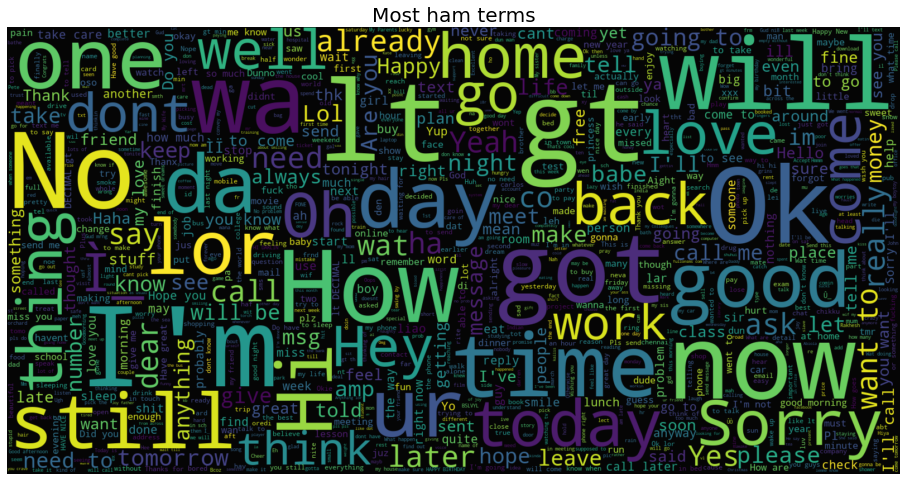

In [17]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", stopwords = STOPWORDS, max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(ham_message))
plt.title("Most ham terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [75]:
spam_messages = []

for i in spam_message:
    spam_messages.append(str(i))

(-0.5, 1599.5, 799.5, -0.5)

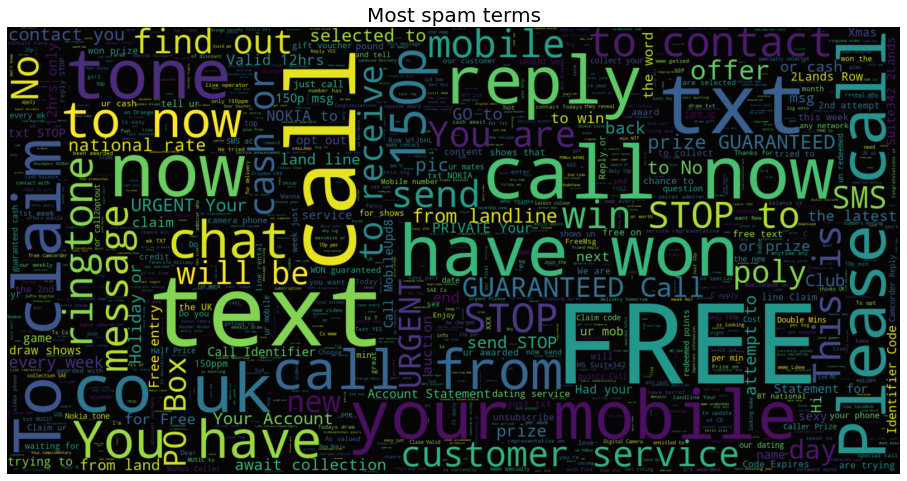

In [18]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", stopwords = STOPWORDS, max_words=1000, max_font_size= 200,  width=1600, height=800)
wc.generate(" ".join(spam_message))
plt.title("Most spam terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

In [19]:
corpus=[]
ps=PorterStemmer()
for i in range(0,df.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.v2[i])
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = ' '.join(words)
    corpus.append(message)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
x = cv.fit_transform(corpus).toarray()

In [21]:
y=df['v1']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
clsf=RandomForestClassifier()
clsf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier()
acc = cross_val_score(clf,x_train,y_train,cv=10,scoring="accuracy")
acc

array([0.98654709, 0.98206278, 0.97533632, 0.96860987, 0.96636771,
       0.97757848, 0.97982063, 0.97078652, 0.98202247, 0.98202247])

In [25]:
y_pred = clsf.predict(x_test)

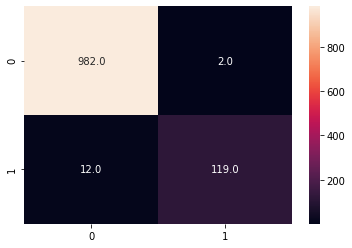

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="0.1f")


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       984
           1       0.98      0.91      0.94       131

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



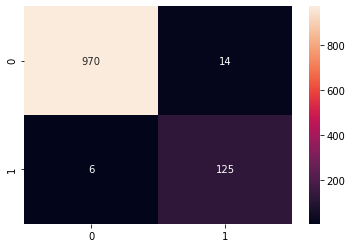

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
y_pred1 = classifier.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_pred1),annot=True,fmt="0.0f")

In [29]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return clsf.predict(temp)

In [30]:
def predict_spam_(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return classifier.predict(temp)

In [33]:
sample_message = 'Please Click On this. To get free subscription'

if predict_spam_(sample_message):
  print('This is a SPAM message!')
else:
  print('This is a normal message.')

This is a SPAM message!


In [34]:
import pickle

In [35]:
filename = 'spam-classifier-multiNB-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [36]:
filename="cv-transform.pkl"
pickle.dump(cv,open(filename,'wb'))